<center>

# Matthias Müllner

## University of Graz
## Center for Accounting Research
</center>

# Simulation of disturbance term and residuals.....

I want to show the difference between the residuals and the disturbance term.
Moreover, I show some properties of these two.

## I assume i know the true model (we do not know that generally):

$ Y =\beta_1 + \beta_2*X +u$ <br>
**Coefficents of the true Model: <br>
$\beta_1 = 0$** <br>
$\beta_2 = 1$ <br>

&rarr; I calculate some Values for the true population regression model, which includes the random
error term $u$. <br><br>
&rarr; I use the generated Values to calculate an estimated model for those observations. <br><br>
&rarr; I show that the estimated model is not equal to the true model. <br><br>
&rarr; I sum all 
residuals and all errors to show that the sum of errors is none zero 
and the sum of residuals is zero.<br><br>

**Unfortunately I got some imprecision due to rounding of coefficents in the regression output (only 4 digits).
Thus, i have to round my sum of residuals on 3 digits as it is calculated by those imprecise coeffictens.**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

list_y = [] 
list_x = []
list_error = []
list_residuals = []

"""
Gererating observations based on the true model-
"""

for i in range(0, 4):
    list_x.append(i)
    y = i + np.random.normal(0, 1)
    list_y.append(y)

    
"""
Computing the estimated Regression model for the generated values.
"""
list_x = sm.add_constant(list_x)
model = sm.OLS(list_y,list_x).fit()
predictions = model.predict(list_x)
print(model.summary())
print("\n")



print("The actual Vaules Y_i")
print(list_y, "\n")

"""
Calculating the error u_i
"""

for k in range(len(list_y)):                 # I calculate the errors as the difference between my actual values 
    error = list_y[k] - list_x[k][1]         # from the values i got of by the model....
    list_error.append(error)

    
print("The error u_i")    
print(list_error,"\n")



print("Sum of errors: ", sum(list_error))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1.781
Date:                Tue, 09 Jul 2019   Prob (F-statistic):              0.314
Time:                        06:09:27   Log-Likelihood:                -6.9628
No. Observations:                   4   AIC:                             17.93
Df Residuals:                       2   BIC:                             16.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      1.632     -0.004      0.9

/home/matthias/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


# Estimated Model

**Clearly the sum of Errors is always unequal to zero, whereas the sum of residuals of the model
have to be zero by construction of our model, which we estimate based on the generated observations** <br>
<br>

I take the generated observations of the true population regression and use that observations to estimate the model I would have to construct when I would not know the true model...<br>
See table of regression for the estimated coefficents for the observations.


In [2]:
list_y = [-0.2784233392786158, 0.41407936653619914, 4.6296882407079725, 2.19776896471927] 
list_residuals = []
list_predicted_y = []
    
for t in range(len(list_y)):
    predicted_y = (1.1644)*t -0.0058
    list_predicted_y.append(predicted_y)
    

for k in range(len(list_y)):
    residual = list_y[k] - list_predicted_y[k]
    list_residuals.append(residual)
    #print(residual)
    
print("The actual Vaules Y_i")
print(list_y,"\n")
print("The predicted Vaules Y^_i")
print(list_predicted_y, "\n")
print("The residuals u^_i = Y_i - Y^_i")
print(list_residuals, "\n")


#print("Sum of the residuals", sum_residuals)
#print(list_predicted_y[0] + list_residuals[0] - list_y[0])

sum_residuals = (sum(list_residuals))

#sum_residuals = round(sum_residuals,3)
print("Sum of residuals: ", sum_residuals)

The actual Vaules Y_i
[-0.2784233392786158, 0.41407936653619914, 4.6296882407079725, 2.19776896471927] 

The predicted Vaules Y^_i
[-0.0058, 1.1586, 2.3230000000000004, 3.4874000000000005] 

The residuals u^_i = Y_i - Y^_i
[-0.2726233392786158, -0.7445206334638009, 2.306688240707972, -1.2896310352807303] 

Sum of residuals:  -8.676731517498482e-05


# The sum of residuals = 0


<br>
Clearly $(\sum_{k=i}^{N} u_i)$ = 0

# Plotting the equations

Here is also some plot for: <br>

**&rarr; The True Model <br>
&rarr; The Estimated Model**


Text(0, 0.5, 'Y')

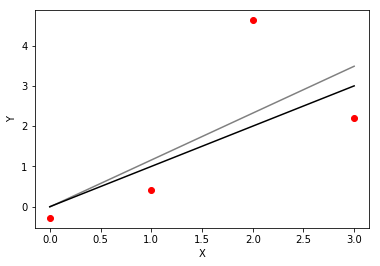

In [4]:
import matplotlib.pyplot as plt

list_y = [-0.2784233392786158, 0.41407936653619914, 4.6296882407079725, 2.19776896471927] 
list_x = [0,1,2,3]
list_predicted_y = [-0.0058, 1.1586, 2.3230000000000004, 3.4874000000000005]


plt.plot(list_x, list_y, "ro") #actual y
plt.plot(list_x, list_predicted_y, "grey") #edtimated model
plt.plot(list_x, list_x, "black") #true model

plt.xlabel("X")
plt.ylabel("Y")

# Summary

Clearly the sum of residuals is smaller than the sum of disturbances. The only reason it is not zero is that
I had to take a coefficient from the regression which is a rounded value.....<br><br>

I hope this shows the difference between the error term and the residual.